In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [27]:
covid_data = pd.read_csv("/kaggle/input/cleaned-data-csv/Cleaned-Data.csv")

In [28]:
covid_data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [29]:
covid_data.shape

(316800, 27)

In [30]:
covid_data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [31]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [32]:
covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fever,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.00,1.0
Tiredness,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Dry-Cough,316800.0,0.562500,0.496079,0.0,0.0,1.0,1.00,1.0
Difficulty-in-Breathing,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Sore-Throat,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.00,1.0
None_Sympton,316800.0,0.062500,0.242062,0.0,0.0,0.0,0.00,1.0
Pains,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.00,1.0
Nasal-Congestion,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
Runny-Nose,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
Diarrhea,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.00,1.0


In [33]:
covid_data.head

<bound method NDFrame.head of         Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion

In [34]:
covid_data.tail

<bound method NDFrame.tail of         Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion

In [35]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Fever,0,0.0
Tiredness,0,0.0
Dry-Cough,0,0.0
Difficulty-in-Breathing,0,0.0
Sore-Throat,0,0.0
None_Sympton,0,0.0
Pains,0,0.0
Nasal-Congestion,0,0.0
Runny-Nose,0,0.0
Diarrhea,0,0.0


<Axes: >

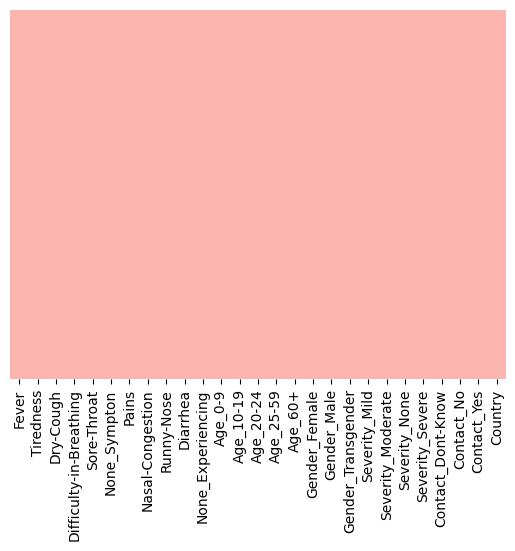

In [36]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

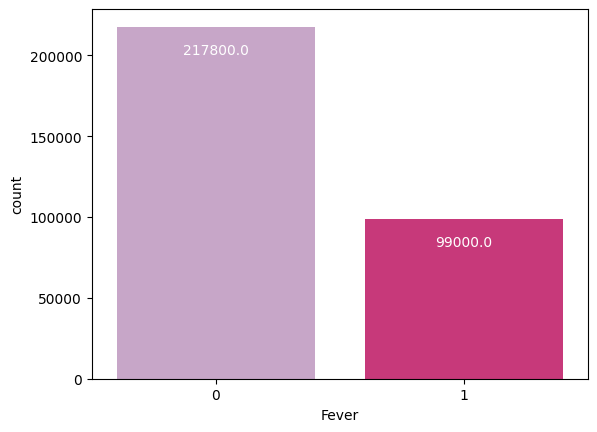

In [39]:
ax = sns.countplot(x='Fever',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

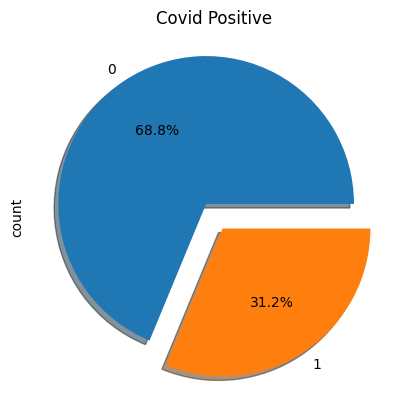

In [41]:
covid_data["Fever"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

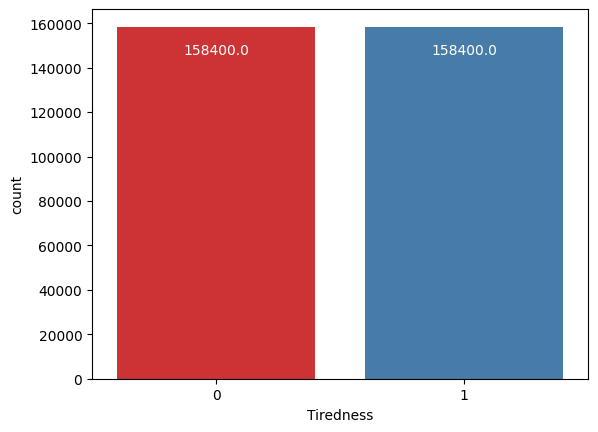

In [43]:
ax = sns.countplot(x='Tiredness',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

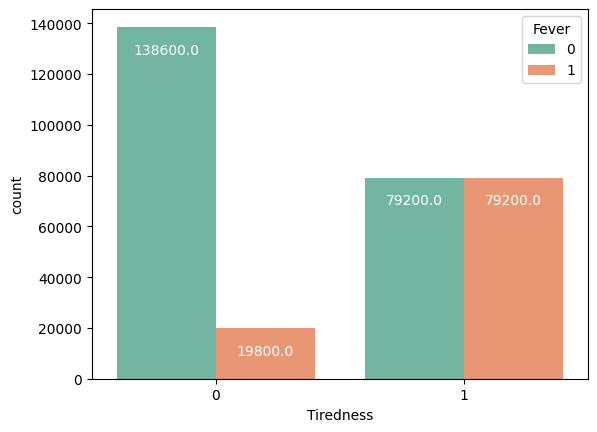

In [44]:
ax = sns.countplot(x='Tiredness',hue='Fever',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

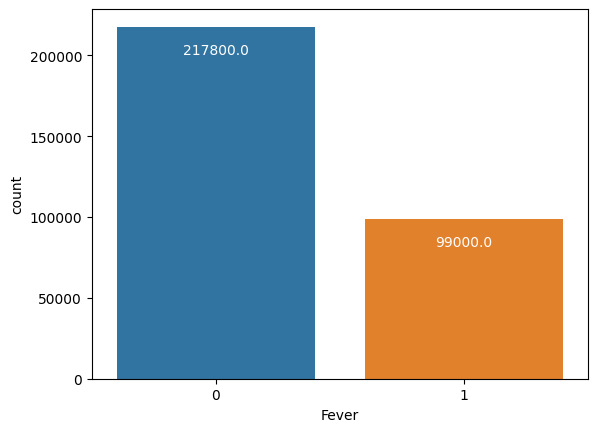

In [45]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

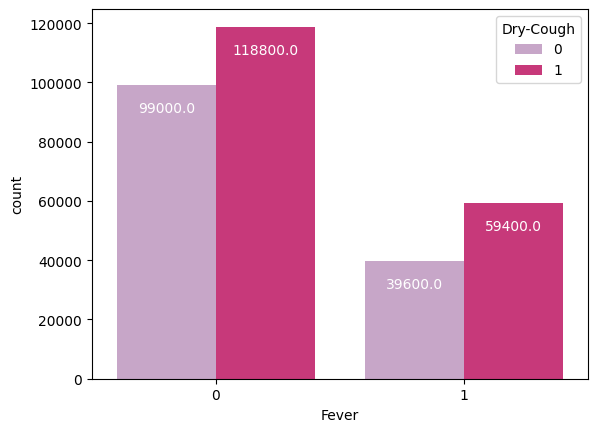

In [46]:
ax = sns.countplot(x='Fever',hue='Dry-Cough',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

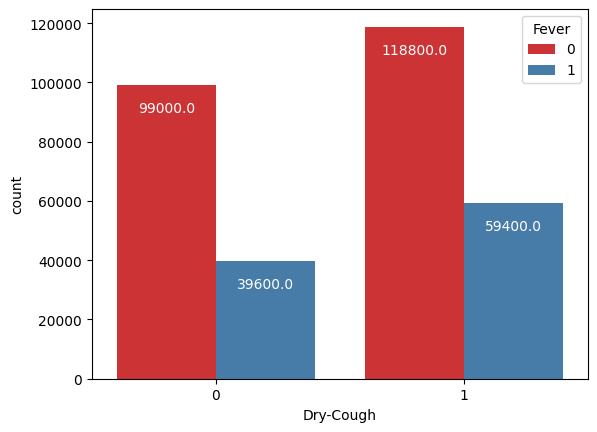

In [48]:
ax = sns.countplot(x='Dry-Cough',hue='Fever',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

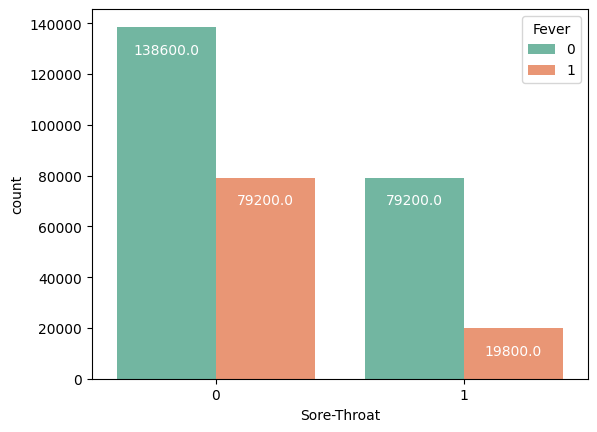

In [49]:
ax = sns.countplot(x='Sore-Throat',hue='Fever',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

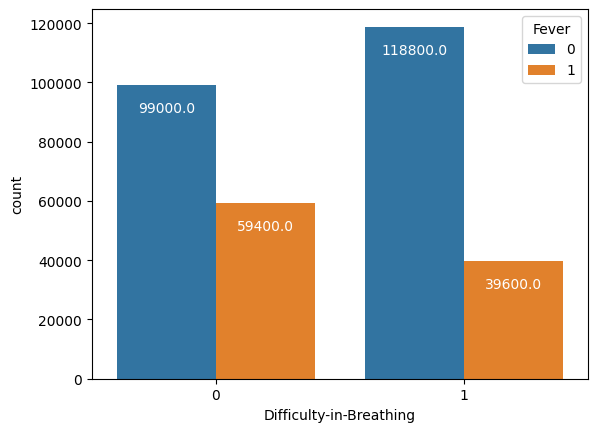

In [50]:
ax = sns.countplot(x='Difficulty-in-Breathing',hue='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

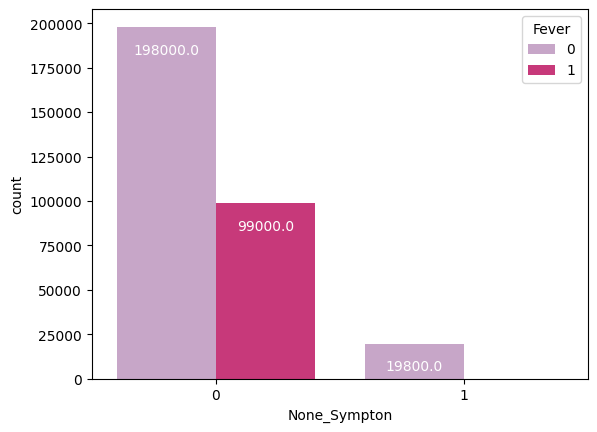

In [51]:
ax = sns.countplot(x='None_Sympton',hue='Fever',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

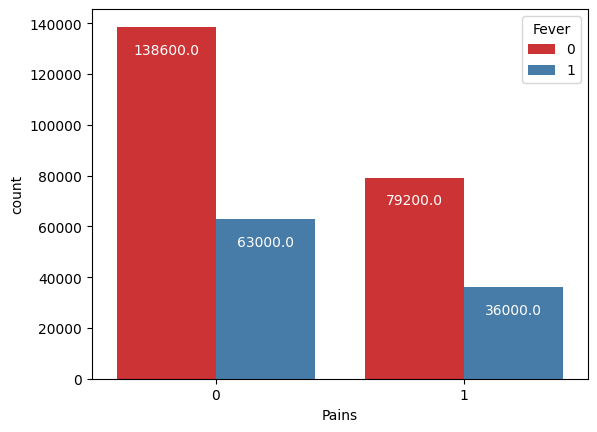

In [52]:
ax = sns.countplot(x='Pains',hue='Fever',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [104]:
e=LabelEncoder()

In [110]:

 covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Tiredness']=e.fit_transform(covid_data['Tiredness'])
covid_data['Dry-Cough']=e.fit_transform(covid_data['Dry-Cough'])
covid_data['Sore-Throat']=e.fit_transform(covid_data['Sore-Throat'])
covid_data['Difficulty-in-Breathing']=e.fit_transform(covid_data['Difficulty-in-Breathing'])
covid_data['Pains']=e.fit_transform(covid_data['Pains'])
covid_data['Runny-Nose']=e.fit_transform(covid_data['Runny-Nose'])
covid_data['Nasal-Congestion']=e.fit_transform(covid_data['Nasal-Congestion'])
covid_data['Diarrhea']=e.fit_transform(covid_data['Diarrhea'])
covid_data['Age_0-9']=e.fit_transform(covid_data['Age_0-9'])
covid_data['Age_10-19']=e.fit_transform(covid_data['Age_10-19'])
covid_data['Age_20-24']=e.fit_transform(covid_data['Age_20-24'])
covid_data['Age_25-59']=e.fit_transform(covid_data['Age_25-59'])
covid_data['Age_60+']=e.fit_transform(covid_data['Age_60+'])
covid_data['Gender_Female']=e.fit_transform(covid_data['Gender_Female'])
covid_data['Gender_Male']=e.fit_transform(covid_data['Gender_Male'])
covid_data['Gender_Transgender']=e.fit_transform(covid_data['Gender_Transgender'])
covid_data['Country']=e.fit_transform(covid_data['Country'])
covid_data['Contact_Yes']=e.fit_transform(covid_data['Contact_Yes'])
covid_data['Contact_No']=e.fit_transform(covid_data['Contact_No'])
covid_data['Contact_Dont-Know']=e.fit_transform(covid_data['Contact_dont-Know'])
covid_data['Severity_Mild']=e.fit_trasform(covid_data['Severity_Mild'])
covid_data['Severity_Moderate']=e.fit_transform(covid_data['Severity_Moderate'])
covid_data['Severity_severe']=e.fit_transform(covid_data['Severity_Severe'])
covid_data['Severity_None']=e.fit_fit_transform(covid_data['Sverity_None'])
covid_data['None_Sympton']=e.fit_transform(covid_data['None_Sympton'])
covid_data['None_Experincing']=e.fit_transform(covid_data['None_Experincing'])



KeyError: 'Fever'

In [100]:
covid_data.head()

,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_10-19,Age_20-24,Age_25-59,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [111]:
covid_data

,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_10-19,Age_20-24,Age_25-59,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,5
316796,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,5
316797,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,5
316798,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,5


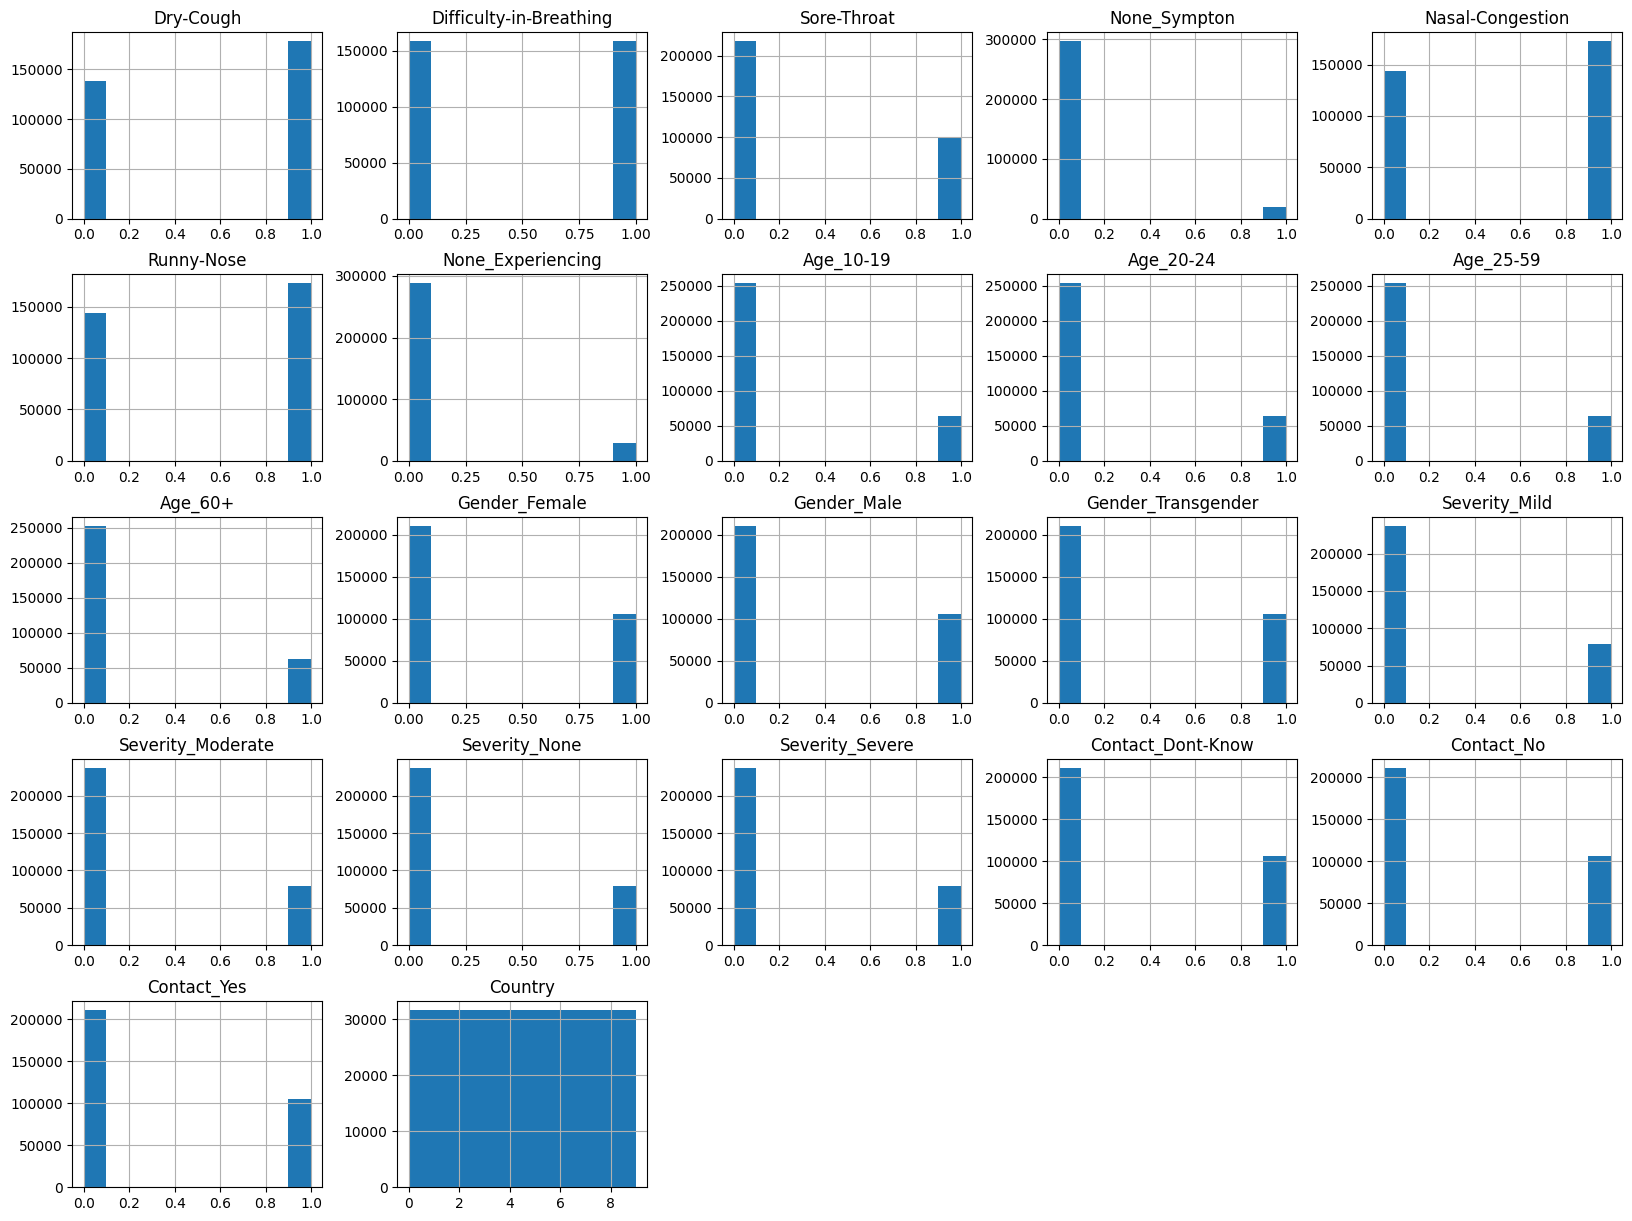

In [112]:
covid_data.hist(figsize=(20,15));

Dry-Cough
1    178200
0    138600
Name: count, dtype: int64


<Axes: xlabel='Dry-Cough', ylabel='count'>

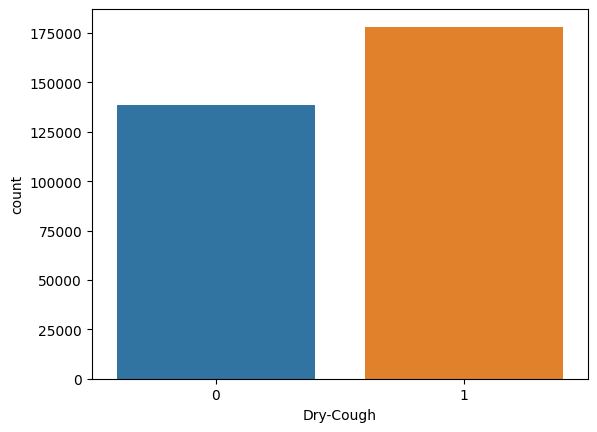

In [116]:
print(covid_data['Dry-Cough'].value_counts())
sns.countplot(x='Dry-Cough',data=covid_data)

Country
0    31680
4    31680
3    31680
7    31680
1    31680
8    31680
2    31680
9    31680
6    31680
5    31680
Name: count, dtype: int64


<Axes: xlabel='Country', ylabel='count'>

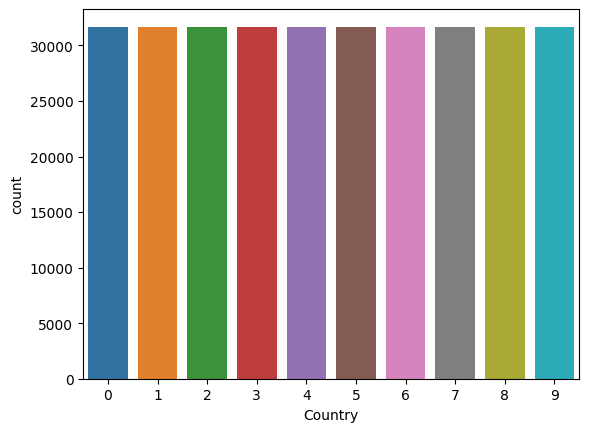

In [120]:
print(covid_data['Country'].value_counts())
sns.countplot(x='Country',data=covid_data)

In [132]:
covid_data=covid_data.drop('Country',axis=1)
covid_data=covid_data.drop('',axis=1)

KeyError: "['Fever'] not found in axis"

In [124]:
covid_data.columns

Index(['Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton',
       'Nasal-Congestion', 'Runny-Nose', 'None_Experiencing', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [125]:
covid_data=covid_data.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

<Axes: >

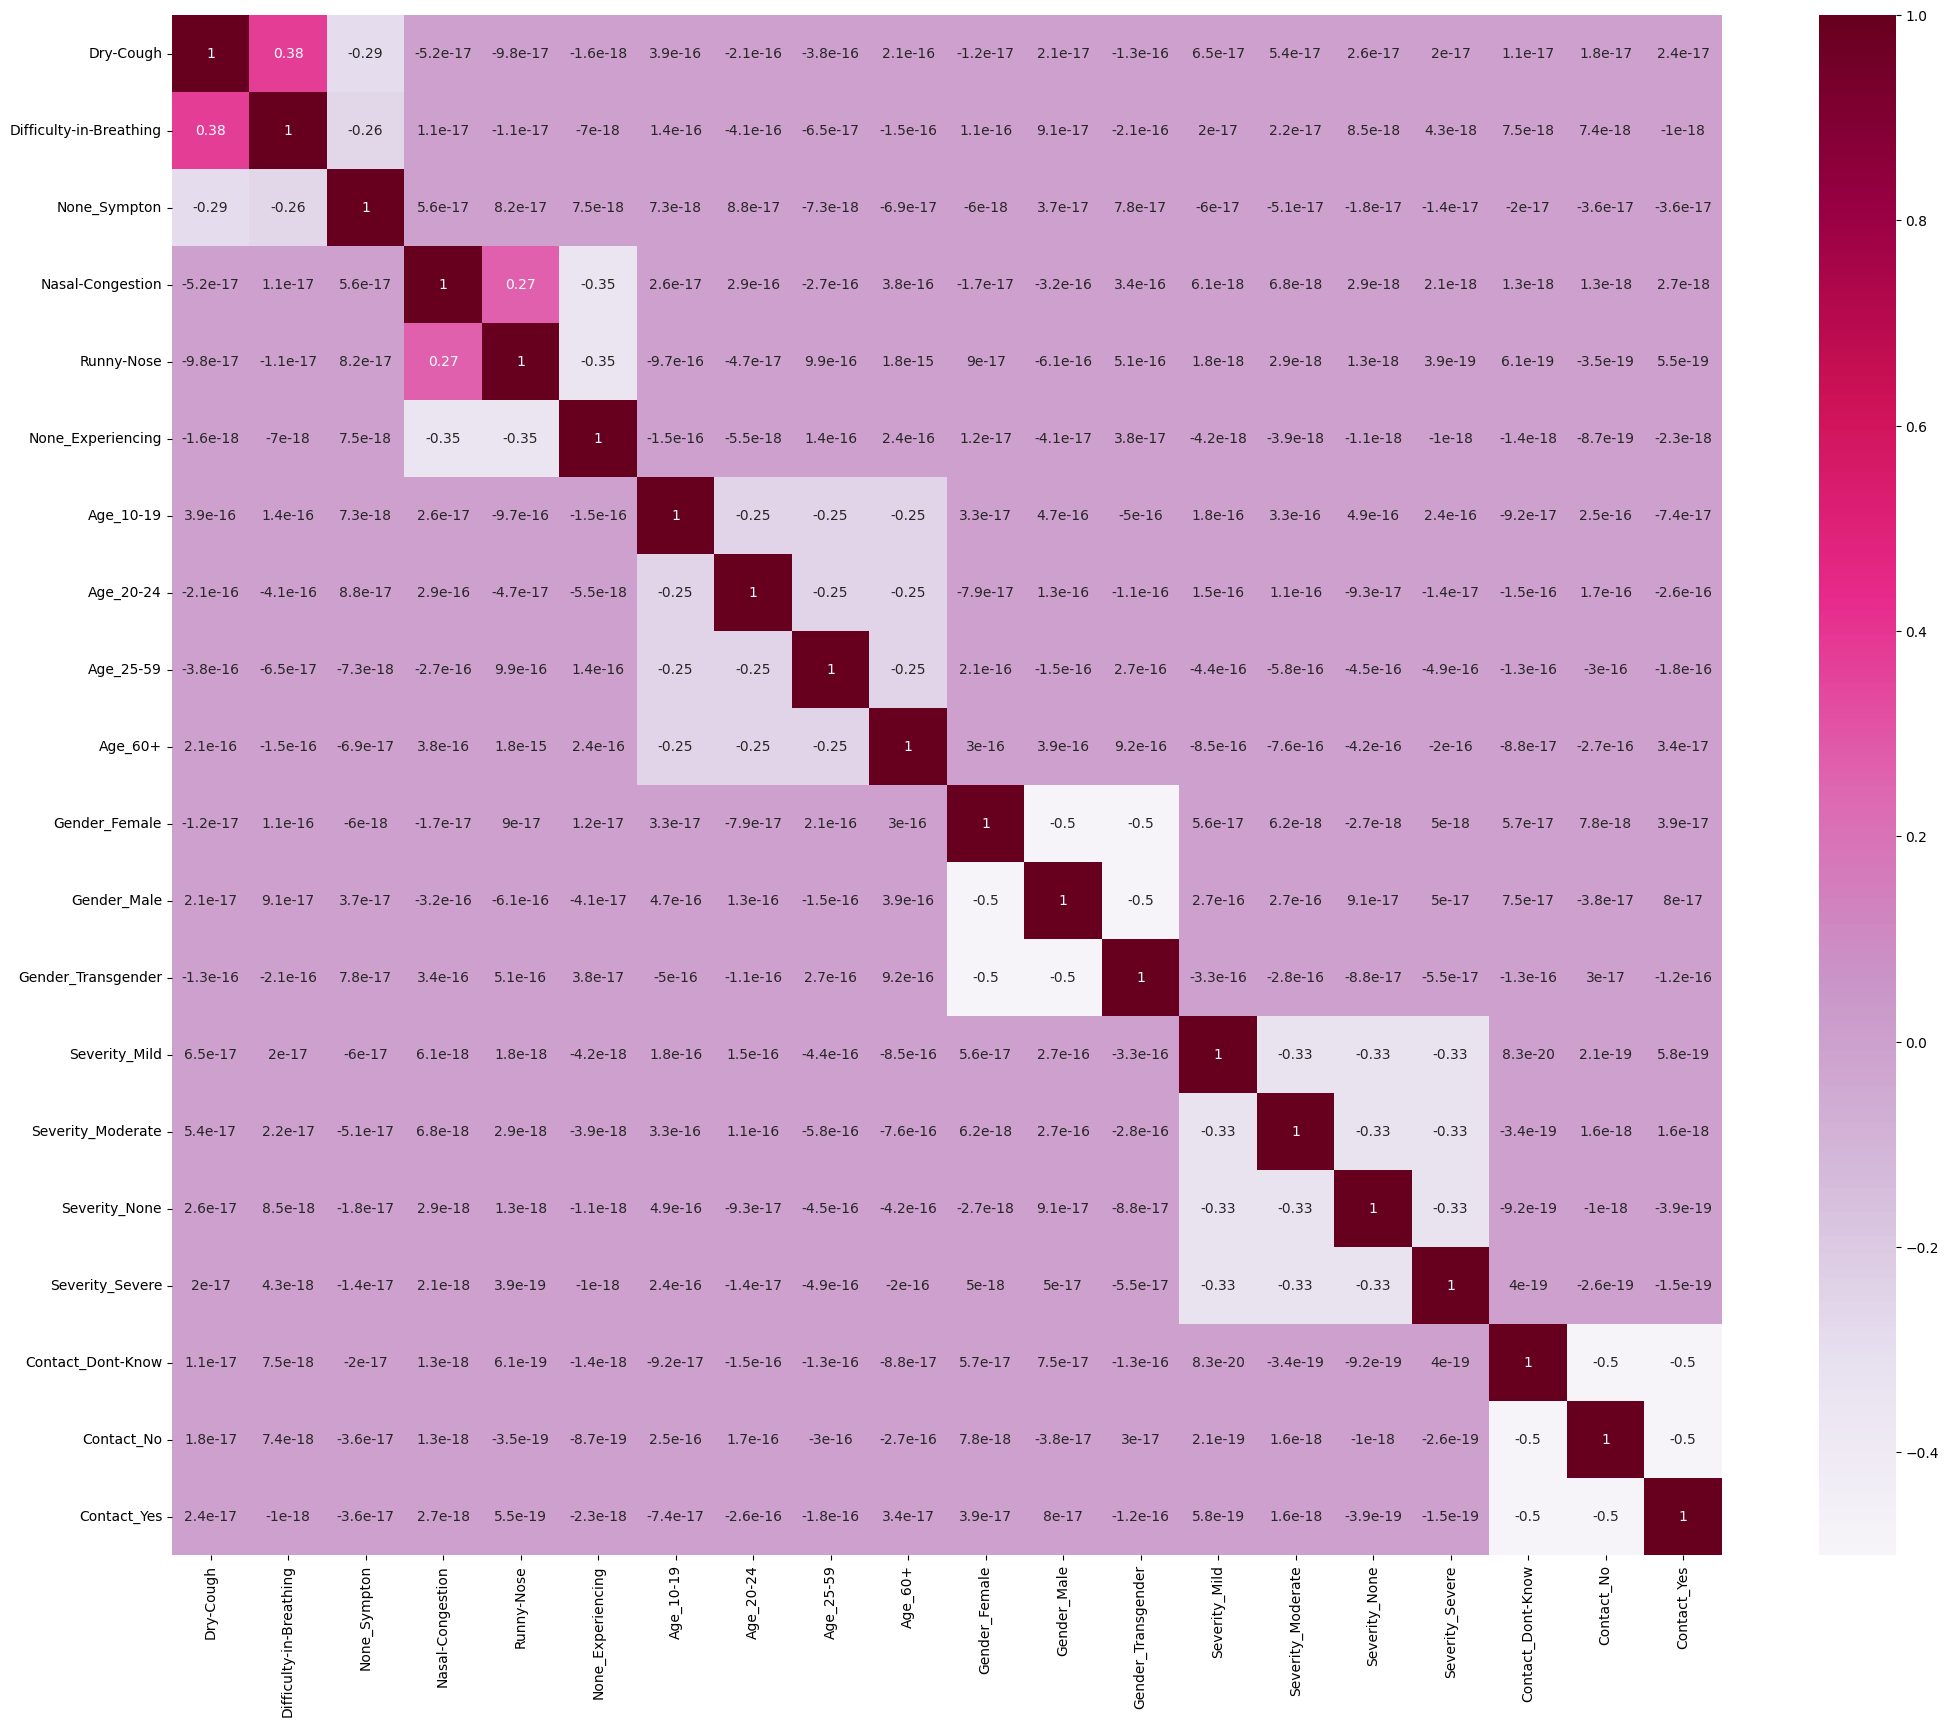

In [133]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [136]:
x=covid_data.drop('Dry_Cough',axis=1)
y=covid_data['Dry_Cough']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

KeyError: "['Dry_Cough'] not found in axis"

In [86]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [88]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

## LOGISTIC REGRESSION 

In [137]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

LOGISTIC REGRESSION


NameError: name 'x_train' is not defined

## K-NEAREST NEIGHBOURS 

In [138]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

NameError: name 'x_train' is not defined

In [ ]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

In [ ]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

## RANDOM FOREST

In [ ]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

In [ ]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

In [ ]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

## GRADIENT BOOSTING CLASSIFIER

### Decision Tree

### Naive bayes

colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
!conda install -c plotly plotly
!pip install colorama

In [ ]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [ ]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [ ]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Score Comparision", xaxis_title="Model", yaxis_title="R2 Scores")
fig.show()

In [ ]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Mean Squared Error Comparision", xaxis_title="Model", yaxis_title="Mean Squared Error")
fig.show()

In [93]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

NameError: name 'px' is not defined

In [92]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [91]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

NameError: name 'x_test' is not defined

<Figure size 2500x1600 with 0 Axes>

In [90]:
import colorama
from colorama import Fore

print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = int(input("Does the patient have breathing problem ? "))
Fever = int(input("Does the patient have fever ? "))
Dry_Cough = int(input("Does the patient have dry cough ? "))
Sore_throat = int(input("Does the patient have sore throat ? "))
Running_Nose = int(input("Does the patient have running nose ? ")) 
Asthma = int(input("Does the patient have any record of asthma ? ")) 
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease ? ")) 
Headache = int(input("Is the patient having headche ? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease ? "))
Diabetes = int(input("Does the patient have diabetes ? "))
Hyper_Tension = int(input("Does the patient have hyper tension ? ")) 
Fatigue = int(input("Does the patient experience fatigue ? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel = int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No


Does the patient have breathing problem ?  1
Does the patient have fever ?  6
Does the patient have dry cough ?  9
Does the patient have sore throat ?  5
Does the patient have running nose ?  8
Does the patient have any record of asthma ?  4
Does the patient have any records of chronic lung disease ?  8
Is the patient having headche ?  5
Does the patient have any record of any heart disease ?  7
Does the patient have diabetes ?  9
Does the patient have hyper tension ?  5
Does the patient experience fatigue ?  8
Does the patient have any gastrointestinal disorders ?  6
Has the patient travelled abroad recently ?  9
Was the patient in contact with a covid patient recently ?  5
Did the patient attend any large gathering event recently ?  7
Did the patient visit any public exposed places recently ?  6
Does the patient have any family member working in public exposed places ?  7


NameError: name 'knn_cv' is not defined